# State Wage and Crime data

In [43]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

# File to Load
wage_estimates_to_load = Path("output/May 2022 State Occupational Employment and Wage Estimates.csv")
crime_data_load = Path("output/estimated_crimes_1979_2020.csv")


# Read Data File and store into Pandas DataFrames
wage_estimates = pd.read_csv(wage_estimates_to_load)
crime_data = pd.read_csv(crime_data_load)

wage_estimates.head()

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,...,18.50,28.94,43.25,"21,580","28,030","38,470","60,190","89,950",NaN,NaN
1,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,...,46.12,63.53,86.89,"47,680","66,210","95,940","132,150","180,730",NaN,NaN
2,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-1011,Chief Executives,...,65.83,90.64,#,"50,920","108,470","136,930","188,530",#,NaN,NaN
3,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-1021,General and Operations Managers,...,47.17,71.64,105.19,"44,530","65,280","98,120","149,010","218,800",NaN,NaN
4,1,Alabama,2,AL,0,Cross-industry,cross-industry,1235,11-1031,Legislators,...,*,*,*,"17,080","18,130","20,320","35,730","57,060",True,NaN


---

### Step 1:

In [44]:
# Filter the wage_estimates to select only the relevant columns 
wage_estimates_summary = wage_estimates[["PRIM_STATE", "OCC_TITLE", "H_MEAN", "A_MEAN", "H_MEDIAN","A_MEDIAN"]]
wage_estimates_summary


,PRIM_STATE,OCC_TITLE,H_MEAN,A_MEAN,H_MEDIAN,A_MEDIAN
0,AL,All Occupations,24.34,"50,620",18.50,"38,470"
1,AL,Management Occupations,53.13,"110,500",46.12,"95,940"
2,AL,Chief Executives,91.67,"190,680",65.83,"136,930"
3,AL,General and Operations Managers,58.00,"120,640",47.17,"98,120"
4,AL,Legislators,*,"30,000",*,"20,320"
...,...,...,...,...,...,...
37564,VI,Industrial Truck and Tractor Operators,15.97,"33,210",15.15,"31,520"
37565,VI,Cleaners of Vehicles and Equipment,13.98,"29,080",13.92,"28,950"
37566,VI,"Laborers and Freight, Stock, and Material Move...",14.58,"30,320",13.73,"28,550"
37567,VI,"Packers and Packagers, Hand",13.35,"27,770",12.59,"26,180"


### Step 2: 

In [45]:
# Rename the columns in the wage_estimates_summary 
wage_estimates_summary = wage_estimates_summary.rename(columns={
    'PRIM_STATE': 'State',
    'OCC_TITLE': 'Occupation',
    'H_MEAN': 'Average hourly wage',
    'A_MEAN': 'Average annual wage',
    'H_MEDIAN': 'Median hourly wage',
    'A_MEDIAN': 'Median annual wage'
})

wage_estimates_summary.head()


,State,Occupation,Average hourly wage,Average annual wage,Median hourly wage,Median annual wage
0,AL,All Occupations,24.34,"50,620",18.50,"38,470"
1,AL,Management Occupations,53.13,"110,500",46.12,"95,940"
2,AL,Chief Executives,91.67,"190,680",65.83,"136,930"
3,AL,General and Operations Managers,58.00,"120,640",47.17,"98,120"
4,AL,Legislators,*,"30,000",*,"20,320"


In [46]:
# show only the rows related to Data Scientists
data_scientists = wage_estimates_summary[(wage_estimates_summary['Occupation'] == 'Data Scientists')]
data_scientists.head()

,State,Occupation,Average hourly wage,Average annual wage,Median hourly wage,Median annual wage
85,AL,Data Scientists,44.03,"91,570",41.29,"85,870"
815,AK,Data Scientists,49.91,"103,810",48.09,"100,040"
1390,AZ,Data Scientists,50.11,"104,220",49.41,"102,770"
2845,CA,Data Scientists,70.86,"147,390",60.97,"126,810"
3671,CO,Data Scientists,56.04,"116,560",49.62,"103,200"


### Step 4: 

In [47]:
# Display the first few rows of the crime_data DataFrame
crime_data


,year,state_abbr,state_name,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,caveats,total_crimes
0,1979,NaN,NaN,220099000,1208030,21460,76390.0,NaN,480700,629480,11041500,3327700,6601000,1112800,NaN,24499060
1,1979,AK,Alaska,406000,1994,54,292.0,NaN,445,1203,23193,5616,15076,2501,NaN,50374
2,1979,AL,Alabama,3769000,15578,496,1037.0,NaN,4127,9918,144372,48517,83791,12064,NaN,319900
3,1979,AR,Arkansas,2180000,7984,198,595.0,NaN,1626,5565,70949,21457,45267,4225,NaN,157866
4,1979,AZ,Arizona,2450000,14528,219,1120.0,NaN,4305,8884,177977,48916,116976,12085,NaN,385010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2179,2020,WA,Washington,7693612,22596,301,NaN,2677.0,5183,14435,210223,40167,142657,27399,NaN,465638
2180,2020,WI,Wisconsin,5832655,18861,308,NaN,2020.0,3081,13452,86654,12744,64517,9393,NaN,211030
2181,2020,WV,West Virginia,1784787,6352,117,NaN,832.0,369,5034,24976,4877,17828,2271,NaN,62656
2182,2020,WY,Wyoming,582328,1364,18,NaN,333.0,66,947,9379,1225,7190,964,NaN,21486


In [48]:
# Rename the columns in the crime_summary 
crime_summary = crime_data[["year", "state_abbr", "total_crimes"]]
crime_summary

,year,state_abbr,total_crimes
0,1979,NaN,24499060
1,1979,AK,50374
2,1979,AL,319900
3,1979,AR,157866
4,1979,AZ,385010
...,...,...,...
2179,2020,WA,465638
2180,2020,WI,211030
2181,2020,WV,62656
2182,2020,WY,21486


In [49]:
# Rename the columns
crime_summary = crime_summary.rename(columns={
    'year': 'Year',
    'state_abbr': 'State',
    'total_crimes': 'Total Crimes'
})

crime_summary.head()

,Year,State,Total Crimes
0,1979,NaN,24499060
1,1979,AK,50374
2,1979,AL,319900
3,1979,AR,157866
4,1979,AZ,385010


In [50]:
# Filter the DataFrame to keep only the year 2020
crime_data_2020 = crime_summary[crime_summary['Year'] == 2020]


crime_data_2020

,Year,State,Total Crimes
2132,2020,AK,45308
2133,2020,AL,254966
2134,2020,AR,199126
2135,2020,AZ,402606
2136,2020,CA,2032160
2137,2020,CO,378304
2138,2020,CT,124258
2139,2020,DC,64052
2140,2020,DE,47234
2141,2020,FL,935848


In [51]:
# Merge the data_scientists DataFrame and the crime_data_2020 DataFrame based on the 'State' column
combined_data = pd.merge(data_scientists.replace(" ", ""), crime_data_2020.replace(" ", ""), on='State', how="left")
combined_data

,State,Occupation,Average hourly wage,Average annual wage,Median hourly wage,Median annual wage,Year,Total Crimes
0,AL,Data Scientists,44.03,"91,570",41.29,"85,870",2020.0,254966.0
1,AK,Data Scientists,49.91,"103,810",48.09,"100,040",2020.0,45308.0
2,AZ,Data Scientists,50.11,"104,220",49.41,"102,770",2020.0,402606.0
3,CA,Data Scientists,70.86,"147,390",60.97,"126,810",2020.0,2032160.0
4,CO,Data Scientists,56.04,"116,560",49.62,"103,200",2020.0,378304.0
5,CT,Data Scientists,52.99,"110,220",50.82,"105,700",2020.0,124258.0
6,DE,Data Scientists,64.10,"133,320",63.61,"132,300",2020.0,47234.0
7,DC,Data Scientists,52.98,"110,190",46.95,"97,660",2020.0,64052.0
8,FL,Data Scientists,48.45,"100,780",48.33,"100,520",2020.0,935848.0
9,GA,Data Scientists,51.16,"106,400",48.27,"100,400",2020.0,515676.0


In [52]:
# Replace non-numeric values with NaN
combined_data = combined_data.replace('*', np.nan)


In [53]:
# Drop rows with missing values
combined_data_clean = combined_data.dropna()
combined_data_clean

,State,Occupation,Average hourly wage,Average annual wage,Median hourly wage,Median annual wage,Year,Total Crimes
0,AL,Data Scientists,44.03,"91,570",41.29,"85,870",2020.0,254966.0
1,AK,Data Scientists,49.91,"103,810",48.09,"100,040",2020.0,45308.0
2,AZ,Data Scientists,50.11,"104,220",49.41,"102,770",2020.0,402606.0
3,CA,Data Scientists,70.86,"147,390",60.97,"126,810",2020.0,2032160.0
4,CO,Data Scientists,56.04,"116,560",49.62,"103,200",2020.0,378304.0
5,CT,Data Scientists,52.99,"110,220",50.82,"105,700",2020.0,124258.0
6,DE,Data Scientists,64.10,"133,320",63.61,"132,300",2020.0,47234.0
7,DC,Data Scientists,52.98,"110,190",46.95,"97,660",2020.0,64052.0
8,FL,Data Scientists,48.45,"100,780",48.33,"100,520",2020.0,935848.0
9,GA,Data Scientists,51.16,"106,400",48.27,"100,400",2020.0,515676.0


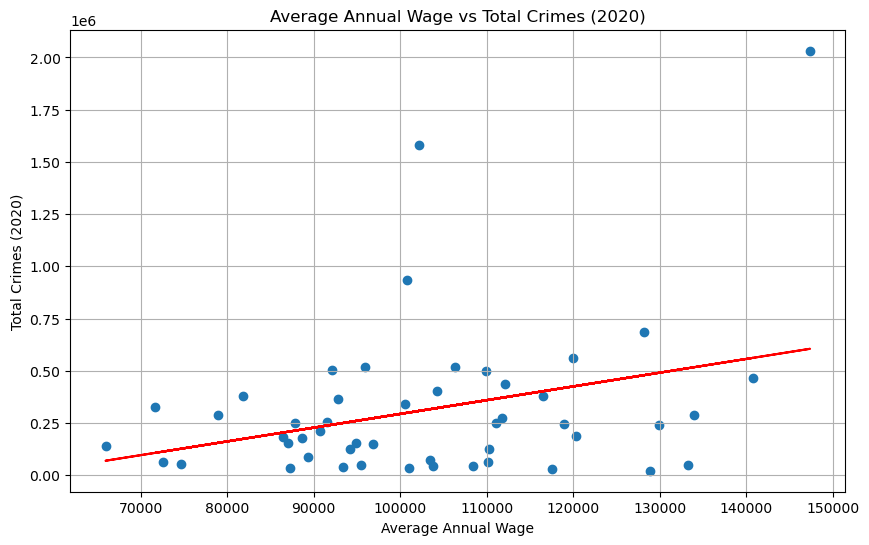

In [140]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(combined_data_clean['Average annual wage'], combined_data_clean['Total Crimes'])
plt.xlabel('Average Annual Wage')
plt.ylabel('Total Crimes (2020)')
plt.title('Average Annual Wage vs Total Crimes (2020)')
plt.grid(True)

# Perform linear regression
x = combined_data_clean['Average annual wage']
y = combined_data_clean['Total Crimes']
m, b = np.polyfit(x, y, 1)  # Fit a first-degree polynomial (line) to the data

# Add the regression line to the plot
plt.plot(x, m*x + b, color='red')

plt.show()
